In [10]:
!python --version
%pip install pandas numpy seaborn

Python 3.8.1
You should consider upgrading via the '/Users/mac/.pyenv/versions/3.8.1/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')

#Importing the data
credit_df = pd.read_csv("german_credit_data.csv", index_col=0)
credit_eda_df = credit_df.copy()
credit_eda_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [12]:
credit_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [13]:
credit_eda_df.shape

(1000, 10)

In [14]:
credit_eda_df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [15]:
credit_eda_df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [16]:
credit_eda_df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [17]:
print("Saving accounts", credit_eda_df['Saving accounts'].unique())
print("Checking accounts", credit_eda_df['Checking account'].unique())

Saving accounts [nan 'little' 'quite rich' 'rich' 'moderate']
Checking accounts ['little' 'moderate' nan 'rich']


In [18]:
credit_eda_df["Saving accounts"].fillna("none", inplace=True)
credit_eda_df["Checking account"].fillna("none", inplace=True)
credit_eda_df.isna().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

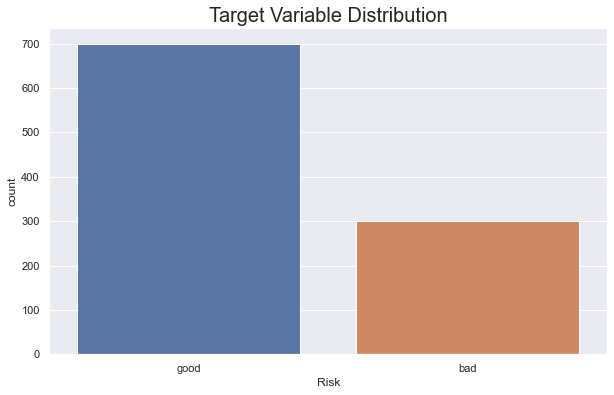

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=credit_eda_df, x="Risk")
plt.title("Target Variable Distribution", fontsize=20)
plt.show()

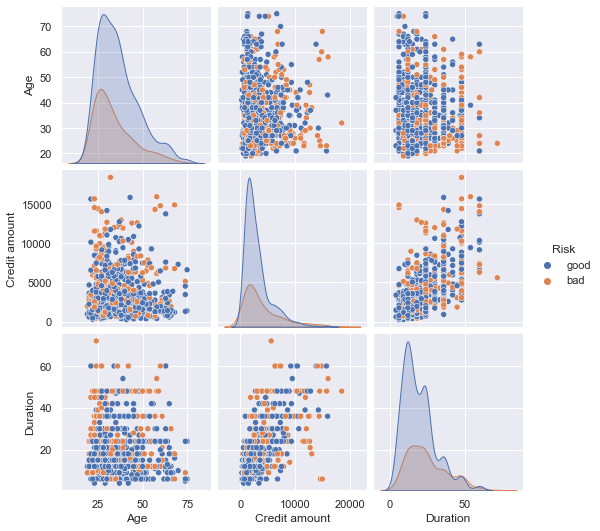

In [20]:
num_cat_risk = ['Age', 'Credit amount', 'Duration', 'Risk']
sns.pairplot(credit_eda_df[num_cat_risk], hue="Risk")
plt.show()

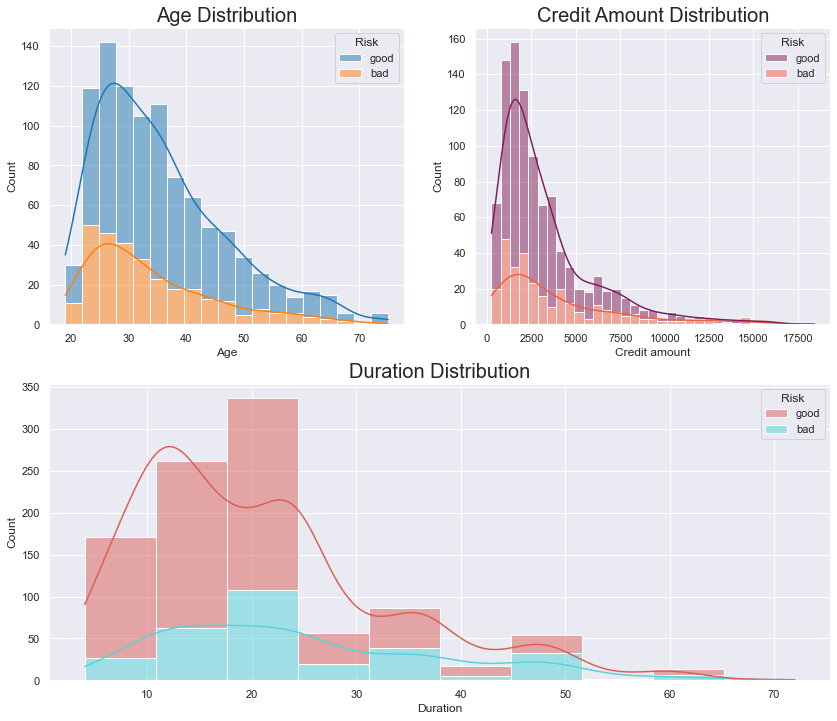

In [21]:
plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sns.histplot(data=credit_eda_df, x='Age', hue='Risk', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Age Distribution", fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data=credit_eda_df, x='Credit amount', hue='Risk', multiple='stack', palette='rocket', kde=True)
ax2.set_title("Credit Amount Distribution", fontsize=20)

plt.subplot(212)
ax3 = sns.histplot(data=credit_eda_df, x='Duration', hue='Risk', multiple='stack', palette='hls', kde=True, bins=10)
ax3.set_title("Duration Distribution", fontsize=20)

plt.show()

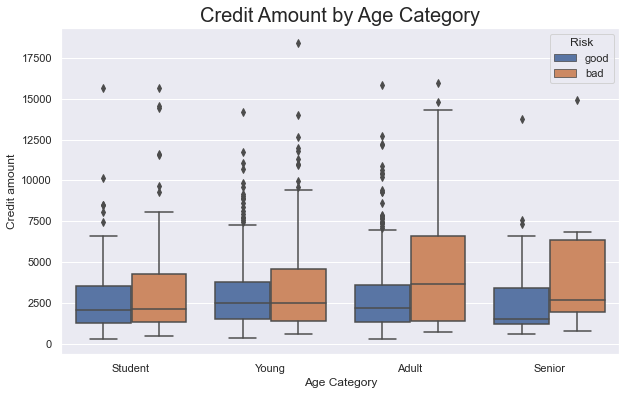

In [22]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
credit_eda_df["Age Category"] = pd.cut(credit_eda_df.Age, interval, labels=cats)

plt.figure(figsize=(10, 6))
plt.title("Credit Amount by Age Category", fontsize=20)
sns.boxplot(data=credit_eda_df, x='Age Category', y='Credit amount', hue='Risk')
plt.show()

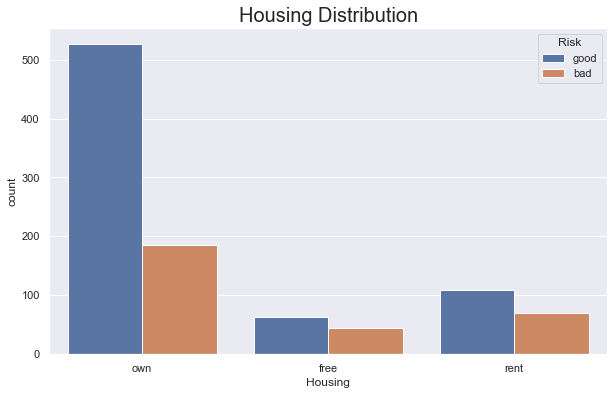

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=credit_eda_df, x='Housing', hue='Risk')
plt.title("Housing Distribution", fontsize=20)
plt.show()

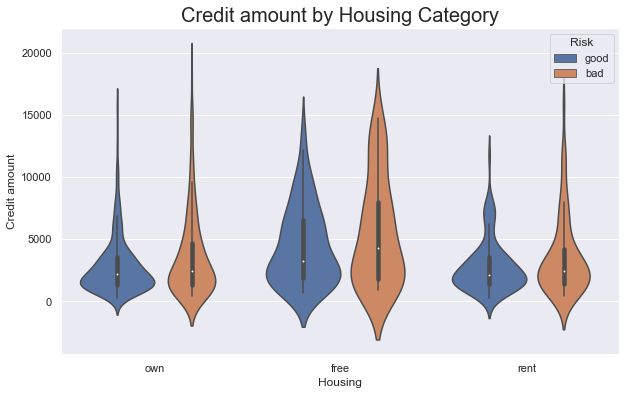

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=credit_eda_df, x='Housing', y='Credit amount', hue='Risk')
plt.title("Credit amount by Housing Category", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Job Category by Gender')

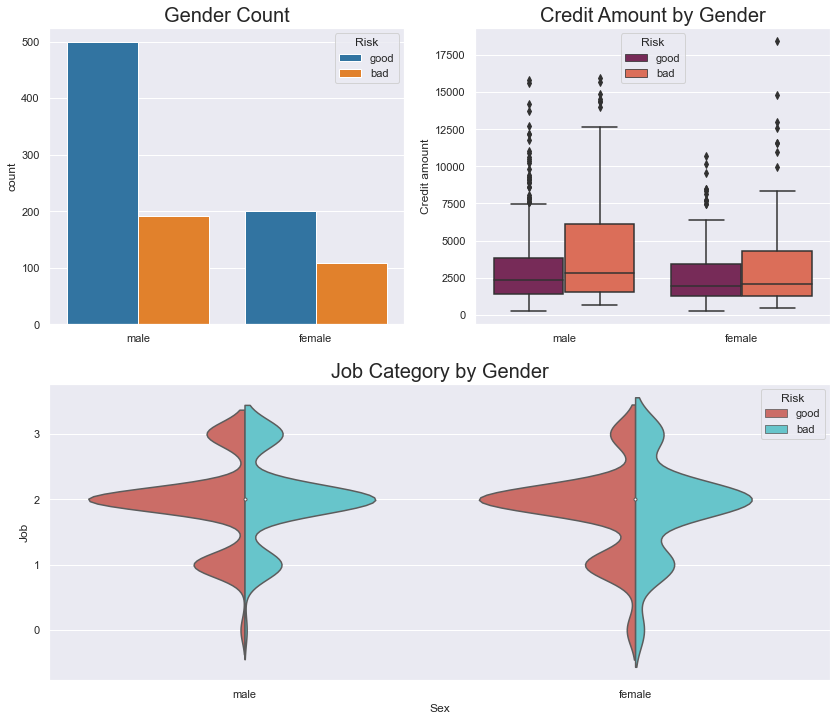

In [25]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=credit_eda_df, x='Sex', hue='Risk', palette='tab10')
ax1.set_title("Gender Count", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=credit_eda_df, x='Sex', y='Credit amount', palette='rocket', hue='Risk')
ax2.set_title("Credit Amount by Gender", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.violinplot(data=credit_eda_df, x='Sex', y='Job', hue='Risk', palette='hls', split=True)
ax3.set_title("Job Category by Gender", fontsize=20)

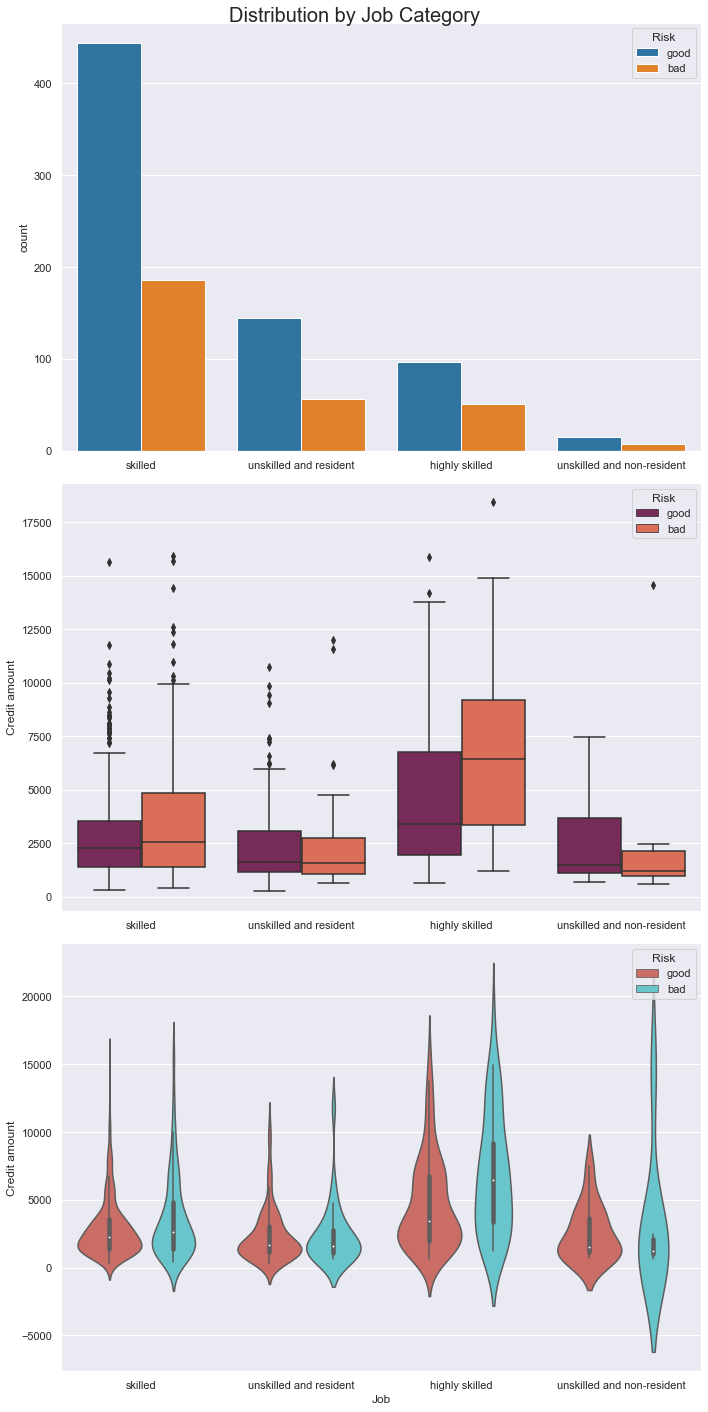

In [26]:
job_category = ['unskilled and non-resident', 'unskilled and resident', 'skilled', 'highly skilled'] # createing categorial values
credit_eda_df['Job'] = credit_eda_df['Job'].replace([0, 1, 2, 3], job_category) # replacing numerical with categorical values

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20))
fig.suptitle("Distribution by Job Category", fontsize=20)
sns.countplot(data=credit_eda_df, x='Job', hue='Risk', palette='tab10', ax=ax1)
ax1.set_xlabel("")

sns.boxplot(data=credit_eda_df, x='Job', y='Credit amount', palette='rocket', hue='Risk', ax=ax2)
ax2.set_xlabel("")

sns.violinplot(data=credit_eda_df, x='Job', y='Credit amount', palette='hls', hue='Risk', ax=ax3)
fig.tight_layout()
plt.show()

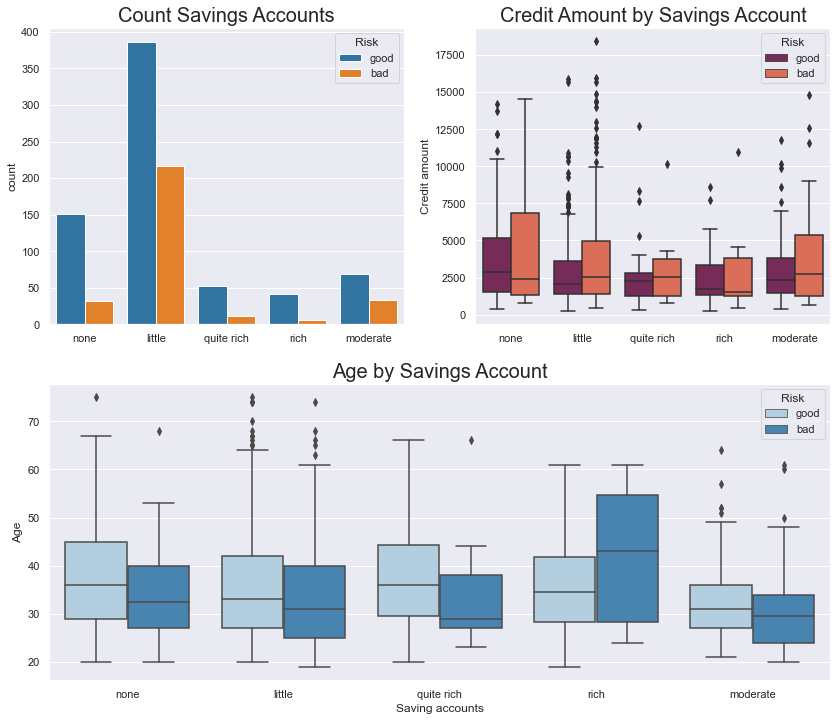

In [27]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=credit_eda_df, x='Saving accounts', hue='Risk', palette='tab10')
ax1.set_title("Count Savings Accounts", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=credit_eda_df, x='Saving accounts', y='Credit amount', hue='Risk', palette='rocket')
ax2.set_title("Credit Amount by Savings Account", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=credit_eda_df, x='Saving accounts', y='Age', hue='Risk', palette='Blues')
ax3.set_title("Age by Savings Account", fontsize=20)

plt.show()

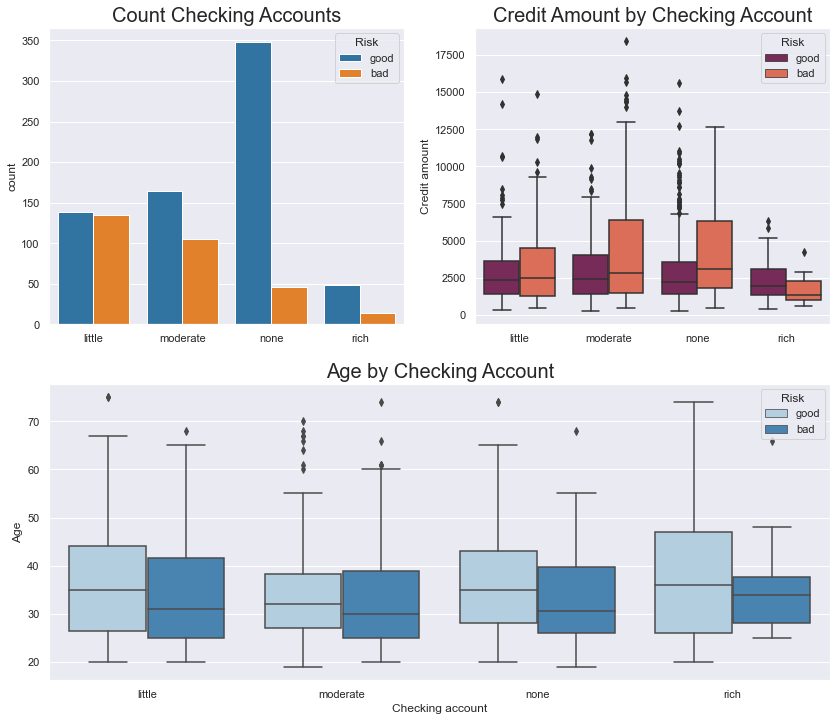

In [28]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=credit_eda_df, x='Checking account', hue='Risk', palette='tab10')
ax1.set_title("Count Checking Accounts", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=credit_eda_df, x='Checking account', y='Credit amount', hue='Risk', palette='rocket')
ax2.set_title("Credit Amount by Checking Account", fontsize=20)
ax2.set_xlabel("")

plt.subplot(212)
ax3 = sns.boxplot(data=credit_eda_df, x='Checking account', y='Age', hue='Risk', palette='Blues')
ax3.set_title("Age by Checking Account", fontsize=20)

plt.show()

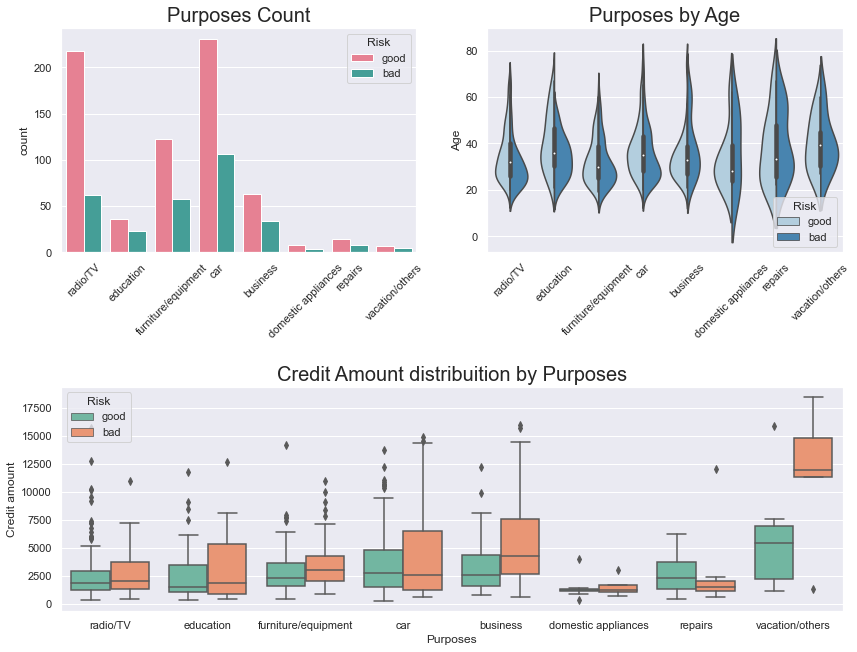

In [29]:
plt.figure(figsize = (14,12))

plt.subplot(221)
ax1 = sns.countplot(data=credit_eda_df, x="Purpose", palette="husl", hue = "Risk")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_xlabel("")
ax1.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
ax2 = sns.violinplot(data=credit_eda_df, x="Purpose", y="Age", palette="Blues", hue = "Risk",split=True)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_xlabel("")
ax2.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
ax3 = sns.boxplot(data=credit_eda_df, x="Purpose", y="Credit amount", palette="Set2", hue = "Risk")
ax3.set_xlabel("Purposes")
ax3.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

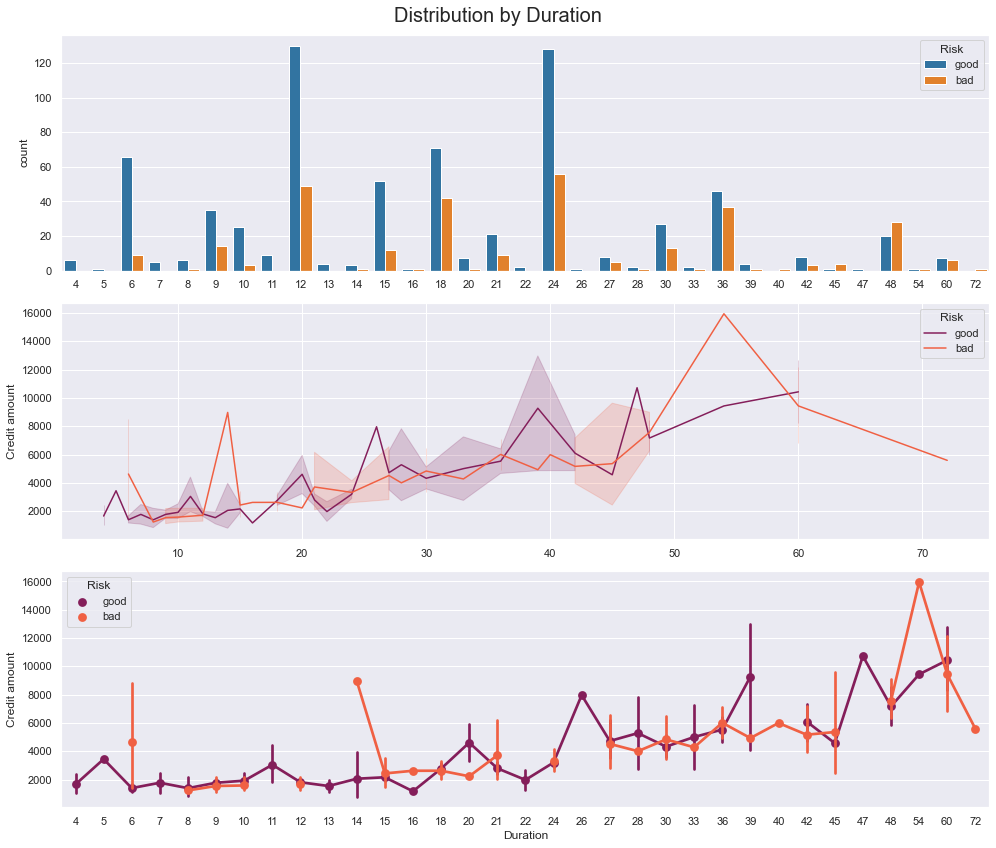

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle("Distribution by Duration", fontsize=20)
sns.countplot(data=credit_eda_df, x='Duration', hue='Risk', palette='tab10', ax=ax1)
ax1.set_xlabel("")

sns.lineplot(data=credit_eda_df, x='Duration', y='Credit amount', hue='Risk', palette='rocket', ax=ax2)
ax2.set_xlabel("")

sns.pointplot(data=credit_eda_df, x='Duration', y='Credit amount', hue='Risk', palette='rocket', ax=ax3)
fig.tight_layout()
plt.show()

In [31]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(credit_eda_df[date_int[0]], credit_eda_df[date_int[1]]).style.background_gradient(cmap = cm)

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [ ]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(credit_eda_df.Purpose, credit_eda_df['Age Category']).style.background_gradient(cmap = cm)